## 5. Random Forest

In [38]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [39]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 83)
X_test shape: (1409, 83)
y_train shape: (5634,)
y_test shape: (1409,)


In [40]:
# Print the columns of the dataframe
print(X_train.columns.tolist())


['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Partner', 'Tenure', 'Monthly Charges', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'P

In [41]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=7)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.95
Precision: 0.99
Recall: 0.84
F1: 0.91
ROC AUC: 0.92


In [43]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/RandomForest.csv", index=False)


In [44]:
model = RandomForestClassifier(random_state=7)
model.fit(X_train, y_train)

importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)

                             Feature  Importance
35                Satisfaction Score    0.391896
51           Contract_Month-to-Month    0.048414
66                  Tenure_Age_Ratio    0.033125
68  MonthlyCharge_TotalCharges_Ratio    0.024712
82          Lifetime_Value_per_Month    0.023091
..                               ...         ...
65          SeniorCitizen_Dependents    0.000103
0                              Count    0.000000
42                        Quarter_Q3    0.000000
40             Country_United States    0.000000
41                  State_California    0.000000

[83 rows x 2 columns]


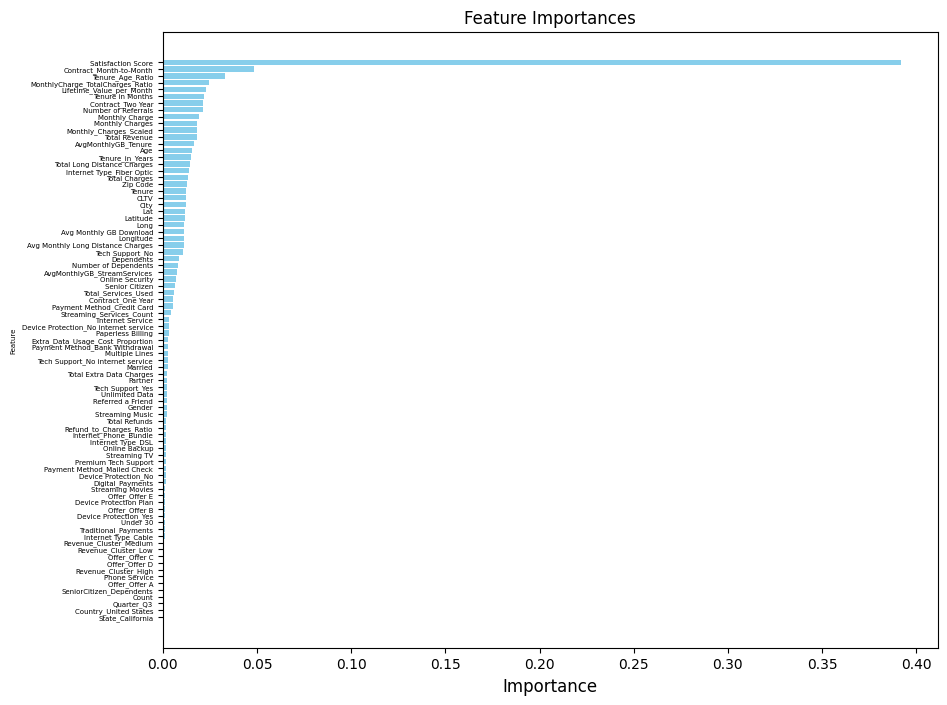

In [50]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=5)
plt.yticks(fontsize=5)
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Summary

1. **Accuracy**
    - Accuracy measures the proportion of correct classifications made by the model. In the context of customer churn prediction, it indicates the overall number of customers correctly classified as either churned or not churned.
    - In this project, an accuracy of 0.95 suggests that the Random Forest model performs well in distinguishing between customers who will churn and those who will not. However, accuracy alone may not be the most reliable metric for an imbalanced dataset, like churn prediction, where the number of churned customers is much smaller compared to non-churned customers.

2. **Precision and Recall**
    - Precision is the proportion of correctly predicted positive observations (churned customers) out of all observations predicted to be positive.
    - Recall is the proportion of correctly predicted positive observations out of all actual positive observations (all churned customers).
    - In churn prediction, precision helps to minimize false positives, ensuring that customers classified as likely to churn are actually at risk of churning. Recall helps to minimize false negatives, ensuring the model does not miss many of the churned customers. These metrics are particularly useful when dealing with imbalanced datasets.
    - The Random Forest model achieved a precision of 0.99 and a recall of 0.84, indicating that it is excellent at identifying most of the churned customers with a very low number of false positives.

3. **F1-Score**
    - The F1-Score is the harmonic mean of precision and recall, providing a balance between both metrics. It is particularly useful when you need a single score that considers both false positives and false negatives.
    - In churn prediction, the F1-score is useful because it provides a balance between precision and recall, especially when a high recall or high precision alone might not be sufficient. The Random Forest model achieved an F1-score of 0.91, indicating a good balance between precision and recall.

4. **ROC-AUC Score**
    - The ROC-AUC score measures the ability of the model to distinguish between positive and negative classes (churned vs. not churned). It is a summary of the ROC curve, where AUC represents the area under the curve. A higher AUC value indicates better performance in distinguishing between the two classes.
    - In churn prediction, the ROC-AUC score helps evaluate the model's ability to correctly differentiate churned customers from those who do not churn. It is particularly useful in assessing different thresholds to understand the model's overall performance in distinguishing between classes. The Random Forest model achieved a ROC-AUC score of 0.92, indicating strong performance in distinguishing between churned and non-churned customers.


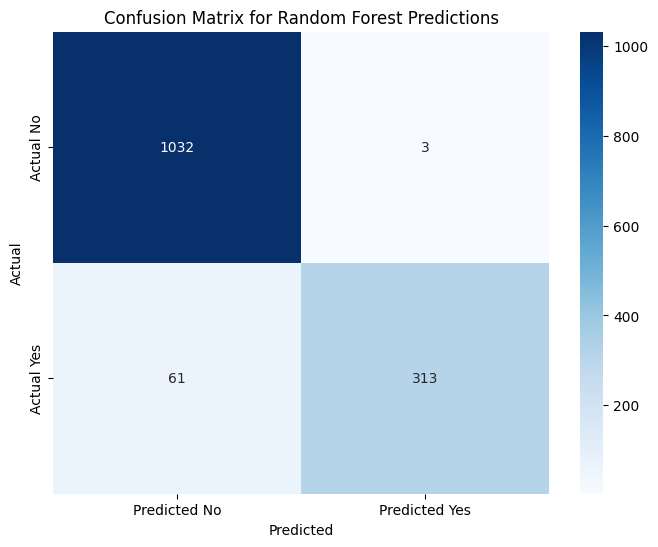

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Predictions')
plt.show()